In [1]:
# Importing libraries and loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/Admin/Downloads/archive (8)/kaggleV2-May-2016.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully")
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows of data:\n")
print(df.head())

print("\nDataset Info")
print(df.info())

print("\nSummary Statistics")
print(df.describe())

print("\nNo-Show Value Counts")
print(df['No-show'].value_counts())

print("\nMissing Values")
print(df.isnull().sum())

Dataset loaded successfully
Shape of dataset: (110527, 14)

First 5 rows of data:

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0 

In [2]:
# Data Cleaning
df = df[df['Age'] >= 0]
df.rename(columns = {'No-show': 'NoShow'}, inplace = True)

df['NoShow'] = df['NoShow'].map({'Yes' : 1, 'No': 0})
print("Unique values in 'Handcap':", df['Handcap'].unique())

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
print("\nCleaned Data Preview:")
print(df.head())

Unique values in 'Handcap': [0 1 2 3 4]

Cleaned Data Preview:
      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589980e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262960e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679510e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841190e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  NoShow  \
0             1         0           0        0       

In [3]:
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x > 0 else 0)
df = df[df['WaitingDays'] >= 0]
print("\nFixed 'Handcap' unique values:", df['Handcap'].unique())
print("Minimum waiting days:", df['WaitingDays'].min())


Fixed 'Handcap' unique values: [0 1]
Minimum waiting days: 0


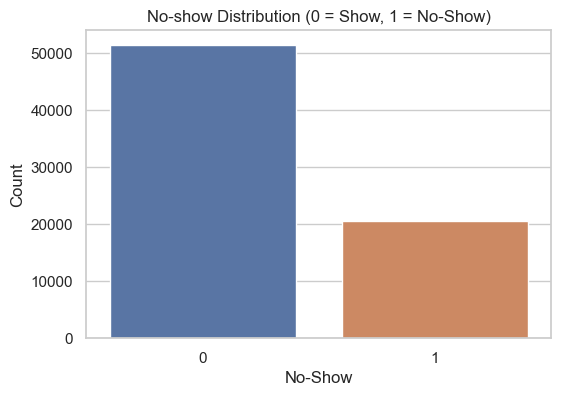

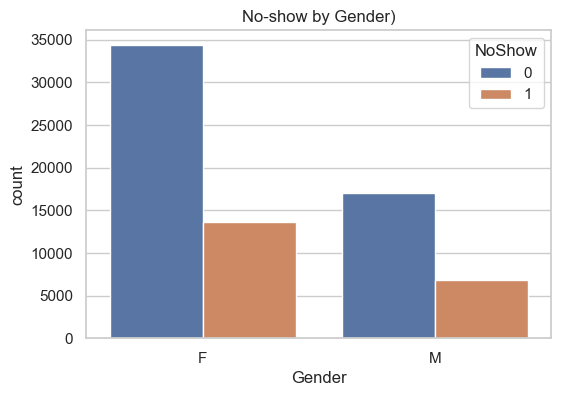

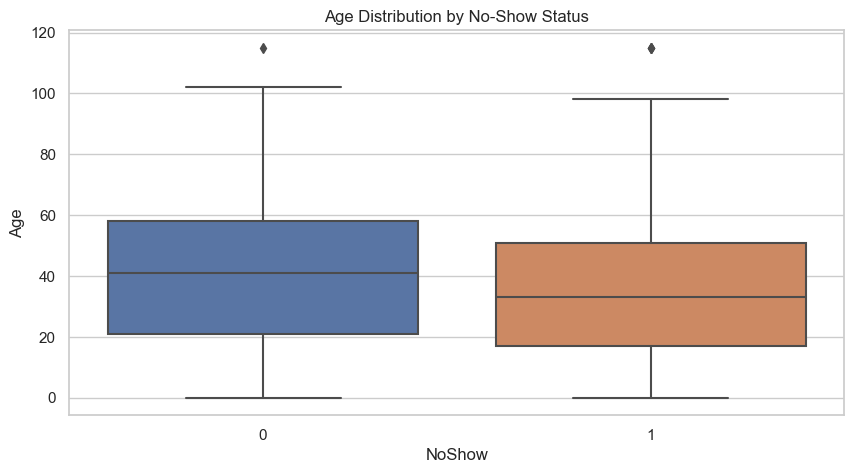

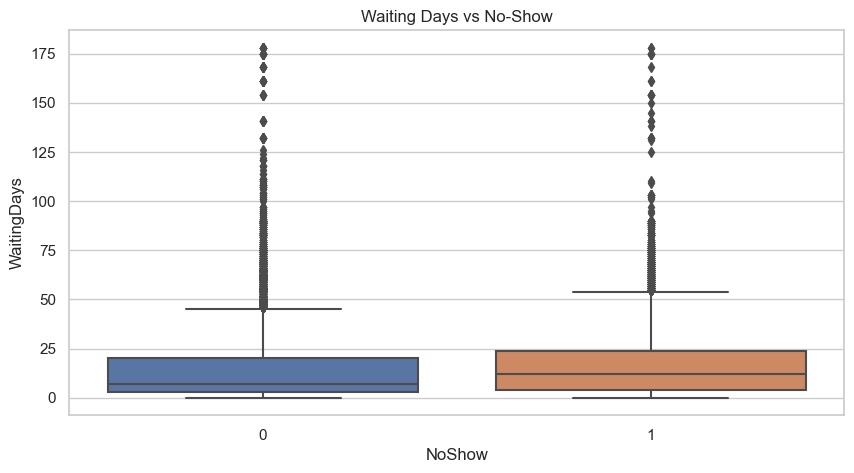

In [4]:
# EDA
import seaborn as sns

sns.set(style = 'whitegrid')

plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'NoShow')
plt.title("No-show Distribution (0 = Show, 1 = No-Show)")
plt.xlabel('No-Show')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Gender', hue = 'NoShow')
plt.title("No-show by Gender)")
plt.show()

plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'NoShow', y = 'Age')
plt.title("Age Distribution by No-Show Status")
plt.show()

plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'NoShow', y = 'WaitingDays')
plt.title("Waiting Days vs No-Show")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df = pd.get_dummies(df, columns = ['Neighbourhood'], drop_first = True)
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [6]:
# Training and Testing
X = df.drop('NoShow', axis = 1)
y = df['NoShow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Training and testing data")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Training and testing data
X_train shape: (50371, 88)
X_test shape: (21588, 88)


In [7]:
# logistic Regression, Decision Tree
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Logistic Regression Results
Accuracy: 0.7141467481934408
Confusion Matrix:
 [[15384    40]
 [ 6131    33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83     15424
           1       0.45      0.01      0.01      6164

    accuracy                           0.71     21588
   macro avg       0.58      0.50      0.42     21588
weighted avg       0.64      0.71      0.60     21588

Decision Tree Results
Accuracy: 0.6345191773207337
Confusion Matrix:
 [[11700  3724]
 [ 4166  1998]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75     15424
           1       0.35      0.32      0.34      6164

    accuracy                           0.63     21588
   macro avg       0.54      0.54      0.54     21588
weighted avg       0.63      0.63      0.63     21588



In [8]:
# Smote with Logistic Regression and Decision Tree
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
print("SMOTE applied. New class distribution:")
print(y_train_balanced.value_counts())

logreg_smote = LogisticRegression(max_iter = 1000)
logreg_smote.fit(X_train_balanced, y_train_balanced)
y_pred_logreg_smote = logreg_smote.predict(X_test)

tree_smote = DecisionTreeClassifier(random_state = 42)
tree_smote.fit(X_train_balanced, y_train_balanced)
y_pred_tree_smote = tree_smote.predict(X_test)

print("Logistic Regression Results with SMOTE")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_smote))

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_smote))

SMOTE applied. New class distribution:
1    36013
0    36013
Name: NoShow, dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results with SMOTE
Accuracy: 0.7006670372429127
Confusion Matrix:
 [[14638   786]
 [ 5676   488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82     15424
           1       0.38      0.08      0.13      6164

    accuracy                           0.70     21588
   macro avg       0.55      0.51      0.48     21588
weighted avg       0.62      0.70      0.62     21588

Decision Tree Results
Accuracy: 0.6171020937557903
Confusion Matrix:
 [[11067  4357]
 [ 3909  2255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     15424
           1       0.34      0.37      0.35      6164

    accuracy                           0.62     21588
   macro avg       0.54      0.54      0.54     21588
weighted avg       0.63      0.62      0.62     21588



In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Results:
Accuracy: 0.673614971280341
Confusion Matrix:
 [[13063  2361]
 [ 4685  1479]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79     15424
           1       0.39      0.24      0.30      6164

    accuracy                           0.67     21588
   macro avg       0.56      0.54      0.54     21588
weighted avg       0.64      0.67      0.65     21588



In [10]:
# XGBoost 
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.7148415786548082
Confusion Matrix:
 [[14954   470]
 [ 5686   478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83     15424
           1       0.50      0.08      0.13      6164

    accuracy                           0.71     21588
   macro avg       0.61      0.52      0.48     21588
weighted avg       0.66      0.71      0.63     21588



In [11]:
# Random forest Smote
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("SMOTE applied to random forest training set:")
print(y_train_sm.value_counts())

rf_smote = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_smote.fit(X_train_sm, y_train_sm)

y_pred_rf_smote = rf_model.predict(X_test)

print("Random Forest with SMOTE Results:")
print("Accuracy:", accuracy_score(y_test,y_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))

SMOTE applied to random forest training set:
1    36013
0    36013
Name: NoShow, dtype: int64
Random Forest with SMOTE Results:
Accuracy: 0.673614971280341
Confusion Matrix:
 [[13063  2361]
 [ 4685  1479]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79     15424
           1       0.39      0.24      0.30      6164

    accuracy                           0.67     21588
   macro avg       0.56      0.54      0.54     21588
weighted avg       0.64      0.67      0.65     21588



In [12]:
# XGBoost Smote
sm = SMOTE(random_state = 42)
X_train_smote_xgb, y_train_smote_xgb = sm.fit_resample(X_train, y_train)
print("SMOTE applied to XGBoost training set:")
print(y_train_smote_xgb.value_counts())

xgb_smote_model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb_smote_model.fit(X_train_smote_xgb, y_train_smote_xgb)

y_pred_xgb_smote = xgb_smote_model.predict(X_test)

print("XGBoost with SMOTE Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_smote))

SMOTE applied to XGBoost training set:
1    36013
0    36013
Name: NoShow, dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [21:00:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost with SMOTE Results:
Accuracy: 0.663053548267556
Confusion Matrix:
 [[12424  3000]
 [ 4274  1890]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77     15424
           1       0.39      0.31      0.34      6164

    accuracy                           0.66     21588
   macro avg       0.57      0.56      0.56     21588
weighted avg       0.64      0.66      0.65     21588



In [13]:
# Random Forest Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state = 42)
random_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter = 20, cv = 3, n_jobs = -1, verbose = 2)
random_search.fit(X_train, y_train)
print("Best parameter:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameter: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 62}


In [14]:
# XGBoost Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv = 3, scoring = 'f1', n_jobs = -1, verbose = -1)
xgb_grid.fit(X_train_sm, y_train_sm)
print("Best parameter:", xgb_grid.best_params_)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [21:11:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameter: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [15]:
# Decision Tree Hyperparameter Tuning 
dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state = 42)

dt_grid = GridSearchCV(dt, dt_params, cv = 3, scoring = 'f1', n_jobs = -1, verbose = -1)
dt_grid.fit(X_train_sm, y_train_sm)
print("Best parameter:", dt_grid.best_params_)


Best parameter: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [16]:
# Random Forest Hyperparameter Tuning Results
best_rf = RandomForestClassifier(
    max_depth = 20,
    max_features = 'log2',
    min_samples_leaf = 2,
    min_samples_split = 10,
    n_estimators = 137,
    random_state = 42
)

best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Accuracy: 0.7150268667778396
Confusion Matrix:
 [[15386    38]
 [ 6114    50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83     15424
           1       0.57      0.01      0.02      6164

    accuracy                           0.72     21588
   macro avg       0.64      0.50      0.42     21588
weighted avg       0.67      0.72      0.60     21588



In [17]:
# XGBoost Hyperparameter Tuning Results
xgb_best = XGBClassifier(
    learning_rate = 0.3, 
    max_depth = 6, 
    n_estimators = 200, 
    subsample = 0.8,
    eval_metric = 'logloss',
    random_state = 42
)

xgb_best.fit(X_train_smote_xgb, y_train_smote_xgb)
y_pred_xgb_best = xgb_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_best))


Accuracy: 0.6748656661108023
Confusion Matrix:
 [[12851  2573]
 [ 4446  1718]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.79     15424
           1       0.40      0.28      0.33      6164

    accuracy                           0.67     21588
   macro avg       0.57      0.56      0.56     21588
weighted avg       0.65      0.67      0.66     21588



In [18]:
# Decision Tree Hyperparameter Tuning Results
dt_best = DecisionTreeClassifier(
    max_depth = 20, 
    min_samples_leaf = 1, 
    min_samples_split = 2,
    random_state = 42
)

dt_best.fit(X_train_sm, y_train_sm)
y_pred_dt_best = dt_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred_dt_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_best))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_best))

Accuracy: 0.5298777098387993
Confusion Matrix:
 [[7781 7643]
 [2506 3658]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.50      0.61     15424
           1       0.32      0.59      0.42      6164

    accuracy                           0.53     21588
   macro avg       0.54      0.55      0.51     21588
weighted avg       0.63      0.53      0.55     21588



In [21]:
# ANN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, input_dim = X_train_sm.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
              metrics = ['accuracy', tf.keras.metrics.AUC(name = 'auc'), tf.keras.metrics.Recall(name = 'recall')])

early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
history = model.fit(X_train_sm, y_train_sm, validation_split = 0.2, 
                    epochs = 30, batch_size = 64, callbacks = [early_stop], verbose = 1)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/30


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5978 - auc: 0.5391 - loss: 0.7616 - recall: 0.1644 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.8983 - val_recall: 0.0000e+00
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6245 - auc: 0.5792 - loss: 0.6536 - recall: 0.0174 - val_accuracy: 2.7766e-04 - val_auc: 0.0000e+00 - val_loss: 0.8466 - val_recall: 2.7766e-04
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6262 - auc: 0.6030 - loss: 0.6480 - recall: 0.0283 - val_accuracy: 0.0595 - val_auc: 0.0000e+00 - val_loss: 0.7760 - val_recall: 0.0595
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6362 - auc: 0.6308 - loss: 0.6386 - recall: 0.0557 - val_accuracy: 0.5081 - val_auc: 0.0000e+00 - val_loss: 0.7470 - val_recall: 0.5081
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6683 - auc: 0.6618 - loss: 0.6268 - recall: 0.2413 - val_accuracy: 0.7084 - val_auc: 0.0000e+00 - val_loss: 0.5792 - val_

In [22]:
# Threshold Tuning
threshold = 0.3
y_pred_thresh = (y_pred_probs >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test,y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

Accuracy: 0.4109227348526959
Confusion Matrix:
 [[ 3576 11848]
 [  869  5295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.23      0.36     15424
           1       0.31      0.86      0.45      6164

    accuracy                           0.41     21588
   macro avg       0.56      0.55      0.41     21588
weighted avg       0.66      0.41      0.39     21588



In [23]:
# Ensemble Model
from sklearn.ensemble import VotingClassifier

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42)
xgb_clf = XGBClassifier(n_estimators = 100, max_depth = 5, use_label_encoder = False, eval_metric = 'logloss')

ensemble = VotingClassifier(
    estimators = [('rf', rf_clf), ('xgb', xgb_clf)],
    voting = 'soft'
)
ensemble.fit(X_train_sm, y_train_sm)
y_pred = ensemble.predict(X_test)


print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [21:24:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6392440244580322
Confusion Matrix:
 [[11366  4058]
 [ 3730  2434]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74     15424
           1       0.37      0.39      0.38      6164

    accuracy                           0.64     21588
   macro avg       0.56      0.57      0.56     21588
weighted avg       0.64      0.64      0.64     21588



C:\Users\Admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


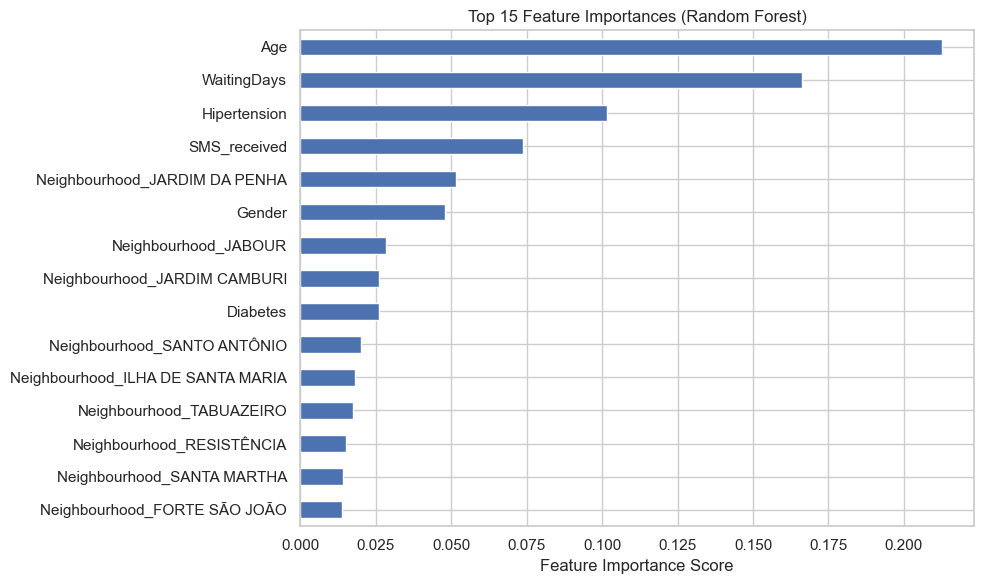

In [24]:
# Feature Importance of Random Forest
rf_clf.fit(X_train_sm, y_train_sm)
xgb_clf.fit(X_train_sm, y_train_sm)

rf_importances = pd.Series(rf_clf.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
rf_importances.nlargest(15).plot(kind = 'barh')
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

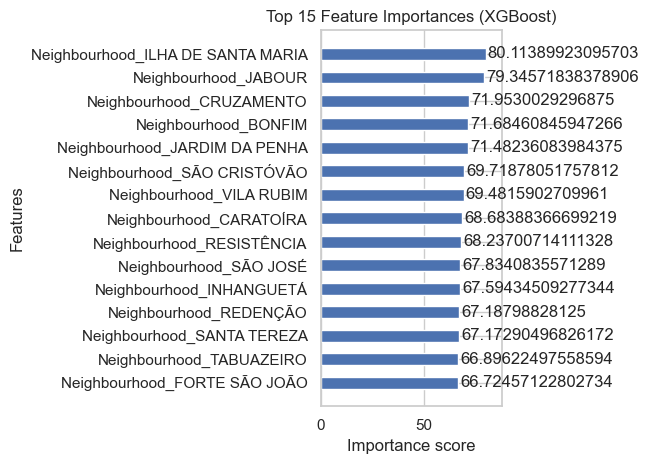

In [25]:
# Feature Importance of XGBoost
import xgboost as xgb
xgb.plot_importance(xgb_clf, max_num_features = 15, importance_type = 'gain', height = 0.5)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

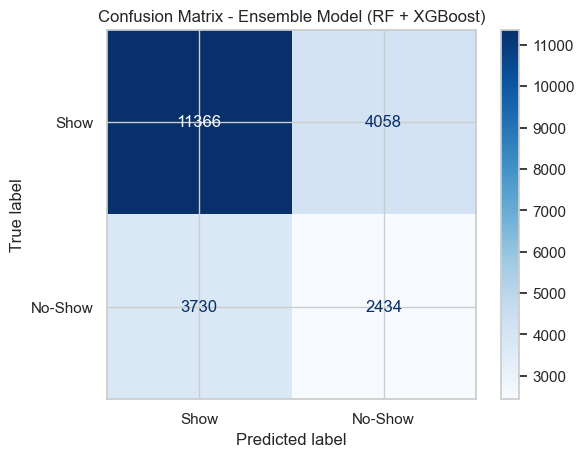

In [26]:
# Confusion Matrix of Ensemble Model
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ensemble, X_test, y_test, display_labels = ['Show', 'No-Show'], cmap = 'Blues')
plt.title("Confusion Matrix - Ensemble Model (RF + XGBoost)")
plt.show()

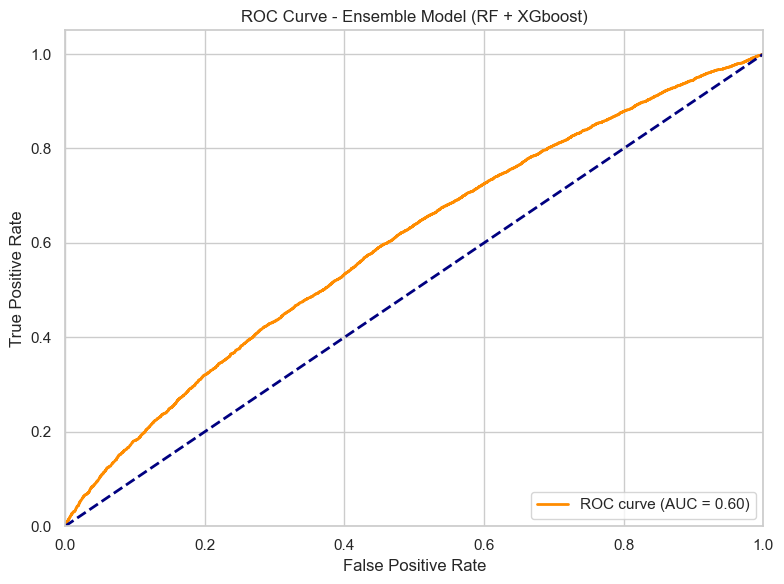

In [27]:
# ROC and AUC of Ensemble Model 
from sklearn.metrics import roc_curve, auc

ensemble_probs = ensemble.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, ensemble_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model (RF + XGboost)')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
